In [1]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period = "max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,0.0,0.0
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,0.0,0.0
2023-04-28 00:00:00-04:00,4129.629883,4170.060059,4127.180176,4169.479980,4087800000,0.0,0.0


<Axes: xlabel='Date'>

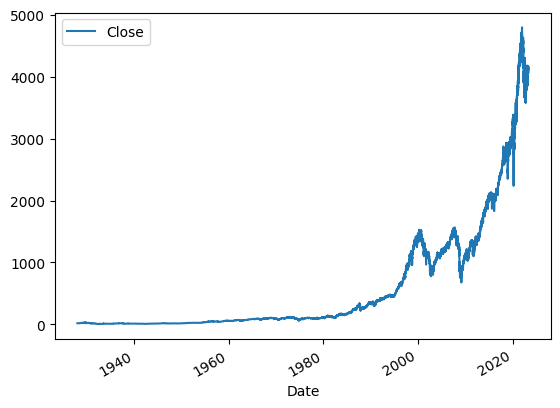

In [5]:
sp500.plot.line(y="Close",  use_index = True)

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,4135.350098
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,4169.479980
2023-04-28 00:00:00-04:00,4129.629883,4170.060059,4127.180176,4169.479980,4087800000,4167.870117


In [8]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,4135.350098,1
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,4169.479980,1
2023-04-28 00:00:00-04:00,4129.629883,4170.060059,4127.180176,4169.479980,4087800000,4167.870117,0


In [9]:
sp500 = sp500.loc["1995-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991,1
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996,0
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993,1
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987,1
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993,1
...,...,...,...,...,...,...,...
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,4135.350098,1
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,4169.479980,1
2023-04-28 00:00:00-04:00,4129.629883,4170.060059,4127.180176,4169.479980,4087800000,4167.870117,0


RANDOM FOREST MODEL

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train_sp500 = sp500.iloc[:-100]
test_sp500 = sp500.iloc[-100:]

predict_sp500 = ["Close","Volume","Open","High","Low"]
model.fit(train_sp500[predict_sp500], train_sp500["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [11]:
predict = model.predict(test_sp500[predict_sp500])
predict = pd.Series(predict, index=test_sp500.index)
predict

Date
2022-12-07 00:00:00-05:00    0
2022-12-08 00:00:00-05:00    0
2022-12-09 00:00:00-05:00    0
2022-12-12 00:00:00-05:00    0
2022-12-13 00:00:00-05:00    0
                            ..
2023-04-26 00:00:00-04:00    0
2023-04-27 00:00:00-04:00    0
2023-04-28 00:00:00-04:00    0
2023-05-01 00:00:00-04:00    0
2023-05-02 00:00:00-04:00    0
Length: 100, dtype: int64

In [12]:
precision_score(test_sp500["Target"], predict)

0.5

<Axes: xlabel='Date'>

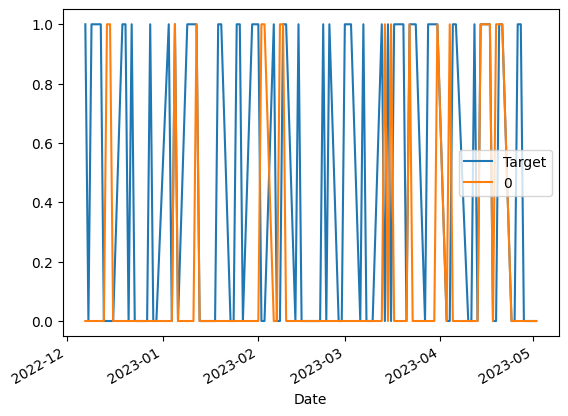

In [13]:
plot_train01 = pd.concat([test_sp500["Target"], predict], axis = 1)
plot_train01.plot()

LINEAR REGRESSION MODEL

In [14]:
from sklearn.linear_model import LinearRegression
model_linearR = LinearRegression()
train_sp500_L = sp500.iloc[:-100]
test_sp500_L = sp500.iloc[-100:]

predict_sp500_L = ["Close","Volume","Open","High","Low"]
model_linearR.fit(train_sp500_L[predict_sp500_L], train_sp500_L["Target"])
predict_L = model_linearR.predict(test_sp500_L[predict_sp500_L])
predict_L = pd.Series(predict_L, index = test_sp500_L.index)
predict_L

Date
2022-12-07 00:00:00-05:00    0.543951
2022-12-08 00:00:00-05:00    0.507881
2022-12-09 00:00:00-05:00    0.568317
2022-12-12 00:00:00-05:00    0.455078
2022-12-13 00:00:00-05:00    0.542001
                               ...   
2023-04-26 00:00:00-04:00    0.551384
2023-04-27 00:00:00-04:00    0.447459
2023-04-28 00:00:00-04:00    0.478300
2023-05-01 00:00:00-04:00    0.551021
2023-05-02 00:00:00-04:00    0.505497
Length: 100, dtype: float64

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(test_sp500_L["Target"], predict_L)
mean_absolute_error(test_sp500_L["Target"], predict_L)

0.5024714859892826

DECISION TREE MODEL

In [16]:
from sklearn.tree import DecisionTreeClassifier
model_Decision = DecisionTreeClassifier(max_depth=3)
train_sp500_D = sp500.iloc[:-100]
test_sp500_D = sp500.iloc[-100:]

predict_sp500_D = ["Close","Volume","Open","High","Low"]
model_Decision.fit(train_sp500_D[predict_sp500_D], train_sp500_D["Target"])
predict_D = model_Decision.predict(test_sp500_D[predict_sp500_D])
predict_D = pd.Series(predict_D, index = test_sp500_D.index)
predict_D

Date
2022-12-07 00:00:00-05:00    1
2022-12-08 00:00:00-05:00    1
2022-12-09 00:00:00-05:00    1
2022-12-12 00:00:00-05:00    1
2022-12-13 00:00:00-05:00    1
                            ..
2023-04-26 00:00:00-04:00    1
2023-04-27 00:00:00-04:00    1
2023-04-28 00:00:00-04:00    1
2023-05-01 00:00:00-04:00    1
2023-05-02 00:00:00-04:00    1
Length: 100, dtype: int64

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(test_sp500_D["Target"], predict_D)

0.5

BACKTESTING OF RANDOM FOREST MODEL

In [18]:
def prediction(train_sp500, test_sp500, predict_sp500, model):
  model.fit(train_sp500[predict_sp500], train_sp500["Target"])
  pred = model.predict(test_sp500[predict_sp500])
  pred = pd.Series(pred, index = test_sp500.index , name = "Predictions")
  plot_train01 = pd.concat([test_sp500["Target"], pred], axis = 1)
  return plot_train01

In [19]:
def backtest(data, model, predict_sp500, start = 2500, step=250):
  all_predictions=[]
  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = prediction(train_sp500, test_sp500, predict_sp500, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [20]:
predictions = backtest(sp500, model, predict_sp500)

In [21]:
predictions["Predictions"].value_counts()

0    1558
1     342
Name: Predictions, dtype: int64

In [22]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5

In [23]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.5
0    0.5
Name: Target, dtype: float64

In [24]:
horizons = [2,5,60,250,1000]
new_predictors = []
for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()
  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]
  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
  new_predictors += [ratio_column, trend_column]

In [25]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996,0,1.001739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993,1,0.999598,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987,1,1.000369,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993,1,1.000163,2.0,1.001077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,4135.350098,1,0.998076,0.0,0.987918,2.0,1.002013,31.0,1.023652,115.0,1.087296,533.0
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,4169.479980,1,1.009688,1.0,1.006975,3.0,1.021371,31.0,1.043841,115.0,1.108197,534.0
2023-04-28 00:00:00-04:00,4129.629883,4170.060059,4127.180176,4169.479980,4087800000,4167.870117,0,1.004110,2.0,1.013511,3.0,1.029588,31.0,1.052416,116.0,1.116954,535.0


In [26]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1998-12-16 00:00:00-05:00,1162.829956,1166.290039,1154.689941,1161.939941,725500000,1179.979980,1,0.999617,1.0,1.002113,2.0,1.057997,37.0,1.079900,138.0,1.473186,568.0
1998-12-17 00:00:00-05:00,1161.939941,1180.030029,1161.939941,1179.979980,739400000,1188.030029,1,1.007703,1.0,1.015052,3.0,1.072569,37.0,1.095716,139.0,1.494695,568.0
1998-12-18 00:00:00-05:00,1179.979980,1188.890015,1178.270020,1188.030029,839600000,1202.839966,1,1.003399,2.0,1.018199,3.0,1.077514,38.0,1.102232,139.0,1.503506,569.0
1998-12-21 00:00:00-05:00,1188.030029,1210.880005,1188.030029,1202.839966,744800000,1203.569946,1,1.006194,2.0,1.020113,4.0,1.088346,38.0,1.114881,140.0,1.520820,569.0
1998-12-22 00:00:00-05:00,1202.839966,1209.219971,1192.719971,1203.569946,680500000,1228.540039,1,1.000303,2.0,1.013727,4.0,1.086469,38.0,1.114439,141.0,1.520316,569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,4055.989990,0,0.992032,1.0,0.986990,2.0,1.006035,31.0,1.027466,116.0,1.091831,533.0
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,4135.350098,1,0.998076,0.0,0.987918,2.0,1.002013,31.0,1.023652,115.0,1.087296,533.0
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,4169.479980,1,1.009688,1.0,1.006975,3.0,1.021371,31.0,1.043841,115.0,1.108197,534.0


In [27]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [28]:
def prediction(train_sp500, test_sp500, predict_sp500, model):
  model.fit(train_sp500[predict_sp500], train_sp500["Target"])
  predict = model.predict_proba(test_sp500[predict_sp500])[:,1]
  predict[predict >= .6] = 1
  predict[predict < .6] = 0
  predict = pd.Series(predict, index = test_sp500.index , name = "Predictions")
  plot_train01 = pd.concat([test_sp500["Target"], predict], axis = 1)
  return plot_train01

In [31]:
predictions = backtest(sp500, model, new_predictors)

KeyError: ignored

In [32]:
predictions["Predictions"].value_counts()

0    1558
1     342
Name: Predictions, dtype: int64

In [33]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5

In [34]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.5
0    0.5
Name: Target, dtype: float64

In [35]:
predictions

,Target,Predictions
Date,,
2022-12-07 00:00:00-05:00,1,0
2022-12-08 00:00:00-05:00,0,0
2022-12-09 00:00:00-05:00,1,0
2022-12-12 00:00:00-05:00,1,0
2022-12-13 00:00:00-05:00,0,0
...,...,...
2023-04-26 00:00:00-04:00,1,0
2023-04-27 00:00:00-04:00,1,0
2023-04-28 00:00:00-04:00,0,0
